In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## show all the datasets in seaborn

In [13]:
list=sns.get_dataset_names()


In [15]:
len(list)

88

## Load Dataset from seaborn

In [16]:
tips=sns.load_dataset('tips')

## Basic DataChecks of tips dataset

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [19]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [21]:
tips.shape

(244, 7)

In [22]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
tips[tips.columns[tips.dtypes=='category']].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [38]:
num_features=[feature for feature in tips.columns if tips[feature].dtypes!='category']
cat_features=[feature for feature in tips.columns if tips[feature].dtypes=='category']
print(num_features)
print(cat_features)

['total_bill', 'tip', 'size']
['sex', 'smoker', 'day', 'time']


In [31]:
for feature in cat_features:
    print(f"{feature} has {len(tips[feature].unique())} categories")

sex has 2 categories
smoker has 2 categories
day has 4 categories
time has 2 categories


## Hist plot and Dist plot for all the numerical features
1. Hist plot --> Y axis (Count)
2. Dist plot --> Y axis (Density)

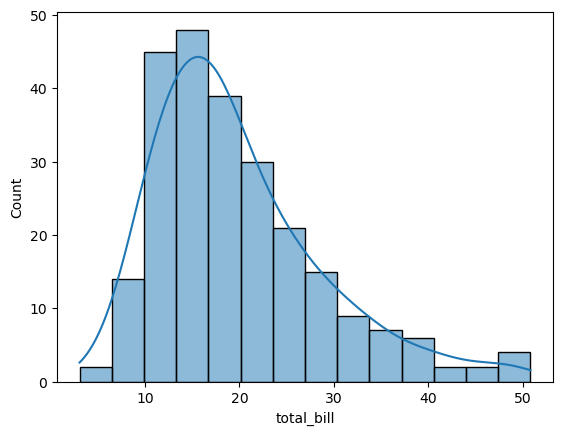

In [45]:
# Histogram
# Can't use for loop directly as all the plots will be in the same figure
#for feature in num_features:
#   sns.histplot(tips[feature])
sns.histplot(tips['total_bill'],kde=True)
plt.show()

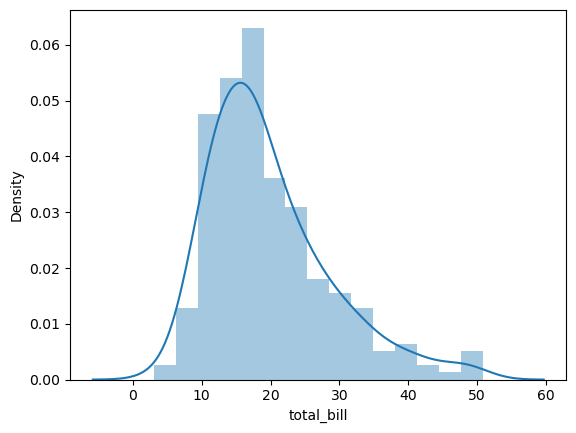

In [44]:
#Distplot:
# Can't use for loop directly as all the plots will be in the same figure
#for feature in num_features:
#   sns.distplot(tips[feature])

sns.distplot(tips['total_bill'],kde=True,bins=15)
plt.show()

## Scatter plot for bivariant Analysis

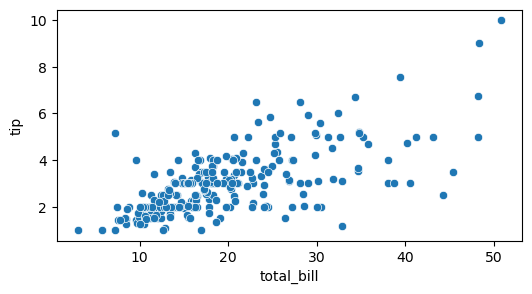

In [50]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=tips.total_bill, y=tips.tip)
plt.show()

# tips and total_bill shows linear relationship: as the bill increases so is the tip amount

## Relplot: Multivariant and bivariant Analysis

<Figure size 600x300 with 0 Axes>

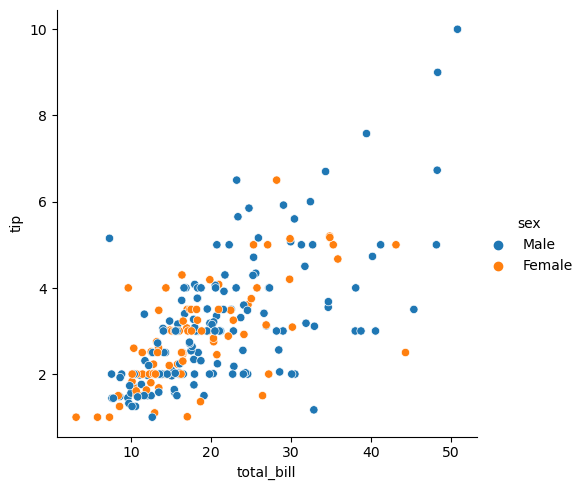

In [57]:
plt.figure(figsize=(6,3))
sns.relplot(x=tips.total_bill, y=tips.tip, hue=tips.sex)
plt.show()

<Figure size 600x300 with 0 Axes>

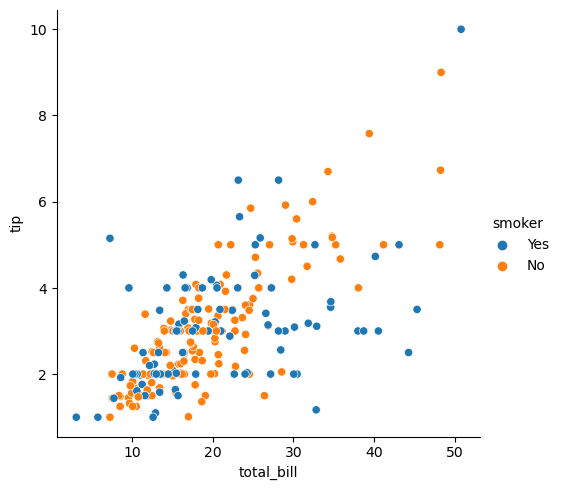

In [58]:
plt.figure(figsize=(6,3))
sns.relplot(x=tips.total_bill, y=tips.tip, hue='smoker', data=tips)
plt.show()

<Figure size 600x300 with 0 Axes>

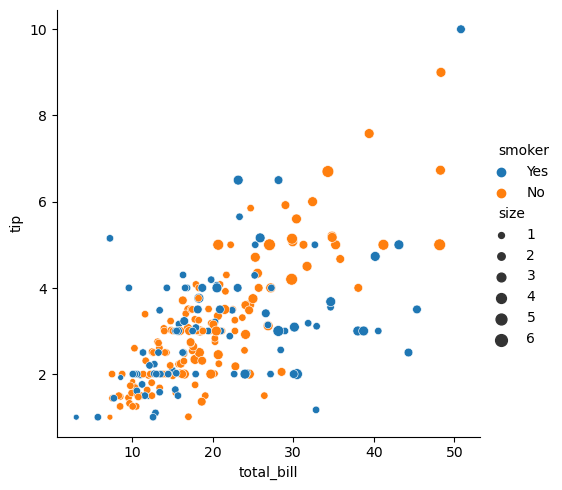

In [64]:
plt.figure(figsize=(6,3))
sns.relplot(x=tips.total_bill, y=tips.tip, hue='smoker', data=tips, size='size')
plt.show()

<Figure size 600x300 with 0 Axes>

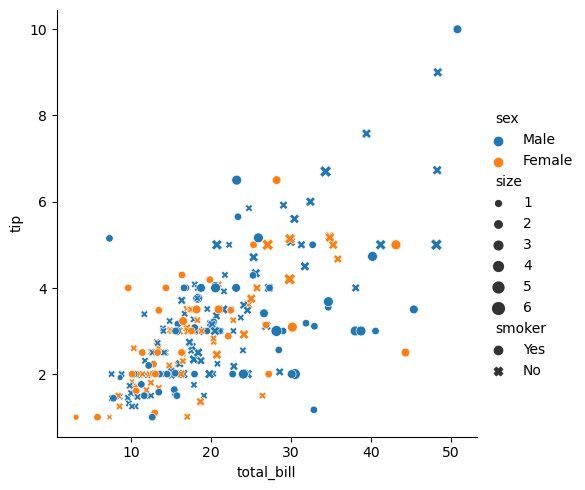

In [67]:
plt.figure(figsize=(6,3))
sns.relplot(x=tips.total_bill, y=tips.tip, hue='sex', data=tips, style='smoker', size='size')
plt.show()

<Figure size 600x300 with 0 Axes>

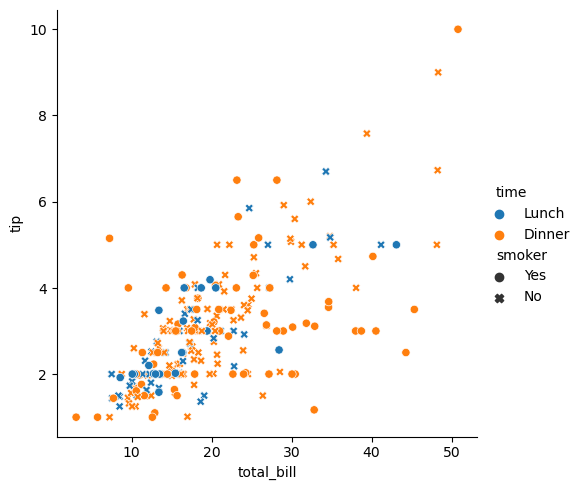

In [68]:
plt.figure(figsize=(6,3))
sns.relplot(x=tips.total_bill, y=tips.tip, hue='time', data=tips, style='smoker')
plt.show()

## Categorical plot and Swarm plot
1. On X-Axis --> Category and on Y-Axis -->Numeric Feature
2. Kind can be of any type: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count
3. For using hue, the category of X Axis and Hue should be same"

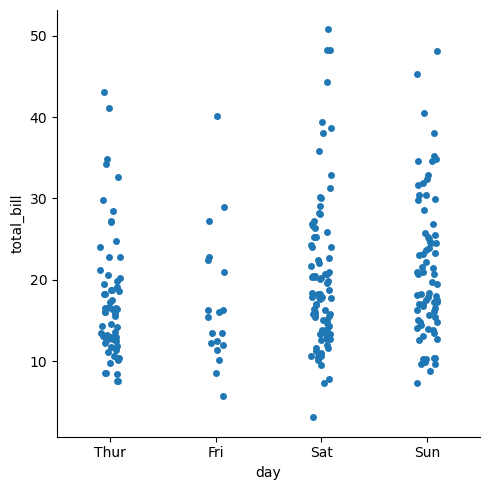

In [70]:
sns.catplot(x=tips.day, y=tips.total_bill)
plt.show()

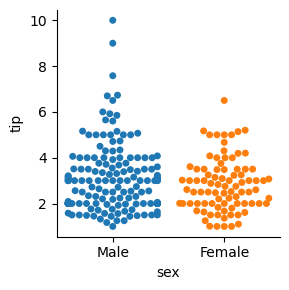

In [153]:
sns.catplot(x=tips.sex, y=tips.tip, kind='swarm',height=3,hue=tips.sex)
plt.show()

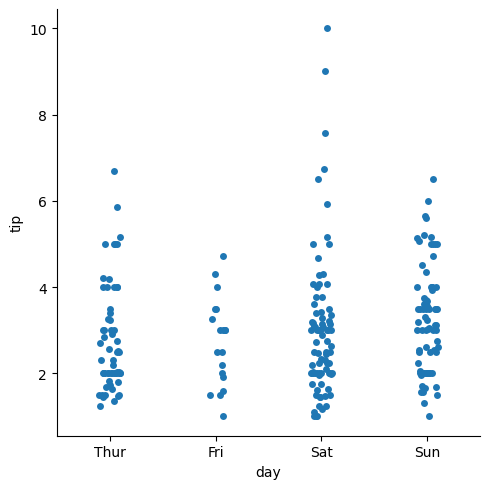

In [76]:
sns.catplot(x=tips.day, y=tips.tip)
plt.show()

## Bar plot
On X-Axis --> Category and on Y-Axis -->Numeric Feature

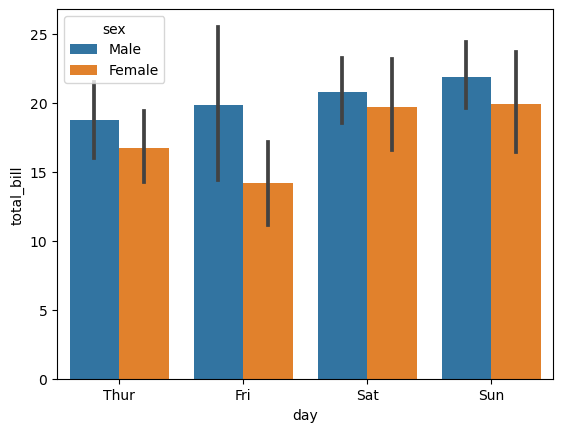

In [78]:
sns.barplot(x='day',y='total_bill',data=tips,hue='sex')
plt.show()

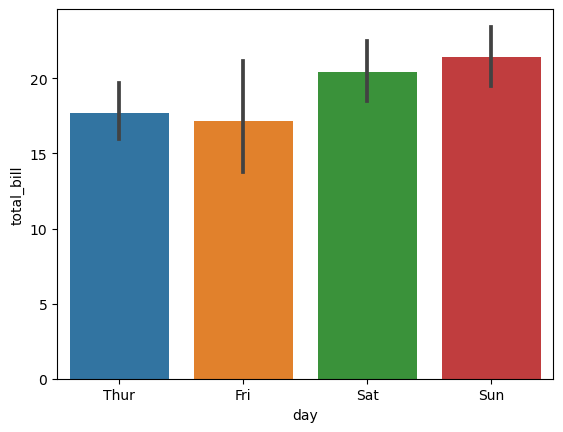

In [80]:
sns.barplot(x='day',y='total_bill',data=tips)
plt.show()

## Joint Plot
1. A scatter plot which will also give distribution, by default distribution is histogram
2. On X-Axis --> Category / Numeric and on Y-Axis -->Numeric Feature
3. Numeric features in both X and Y axis is preferred in scatter and jointplot

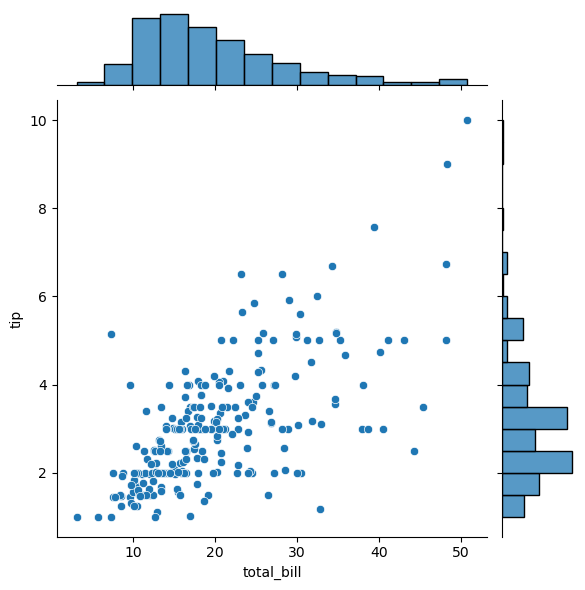

In [88]:
sns.jointplot(x=tips.total_bill, y=tips.tip)
plt.show()

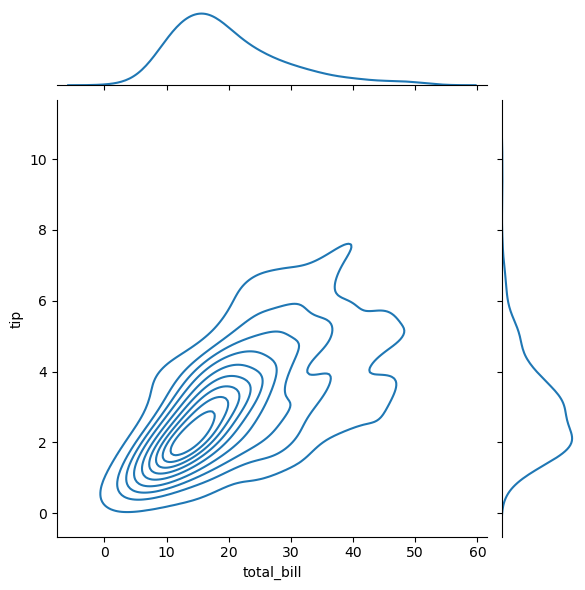

In [91]:
#Contour plot
sns.jointplot(x=tips.total_bill, y=tips.tip, kind='kde')
plt.show()

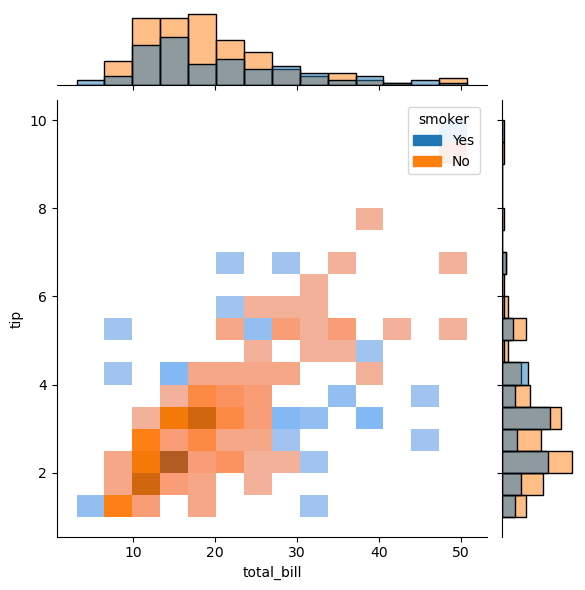

In [93]:
sns.jointplot(x=tips.total_bill, y=tips.tip, kind='hist', hue=tips.smoker)
plt.show()

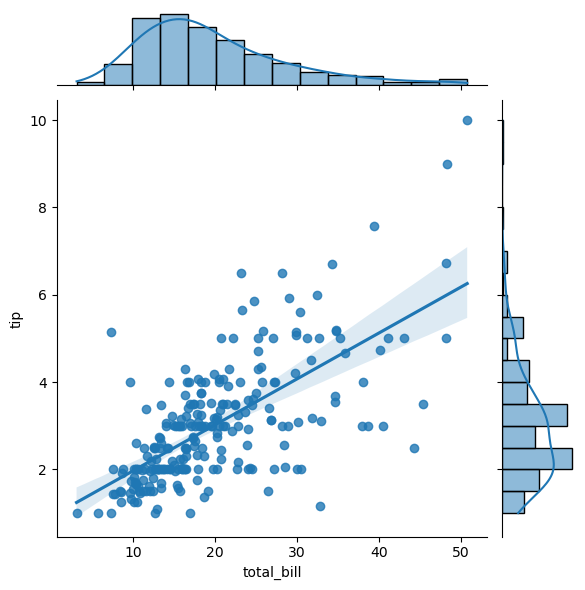

In [94]:
sns.jointplot(x=tips.total_bill, y=tips.tip, kind='reg')
plt.show()

## Pair plot:
1. Displays all pair wise relationship, for x and y same --> histogram, for x and y different --> scatter plot
2. Applicable to numerical features only

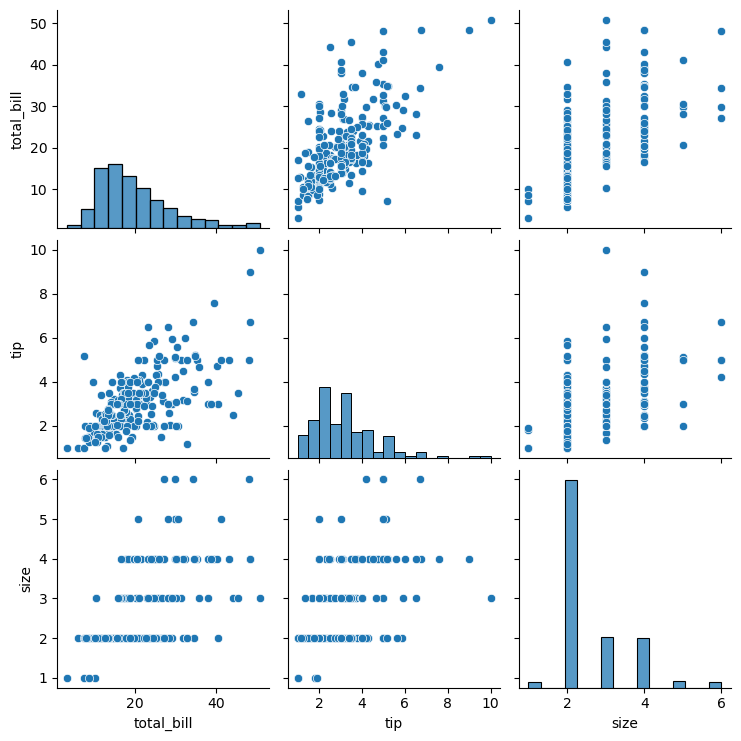

In [97]:
sns.pairplot(tips)
plt.show()

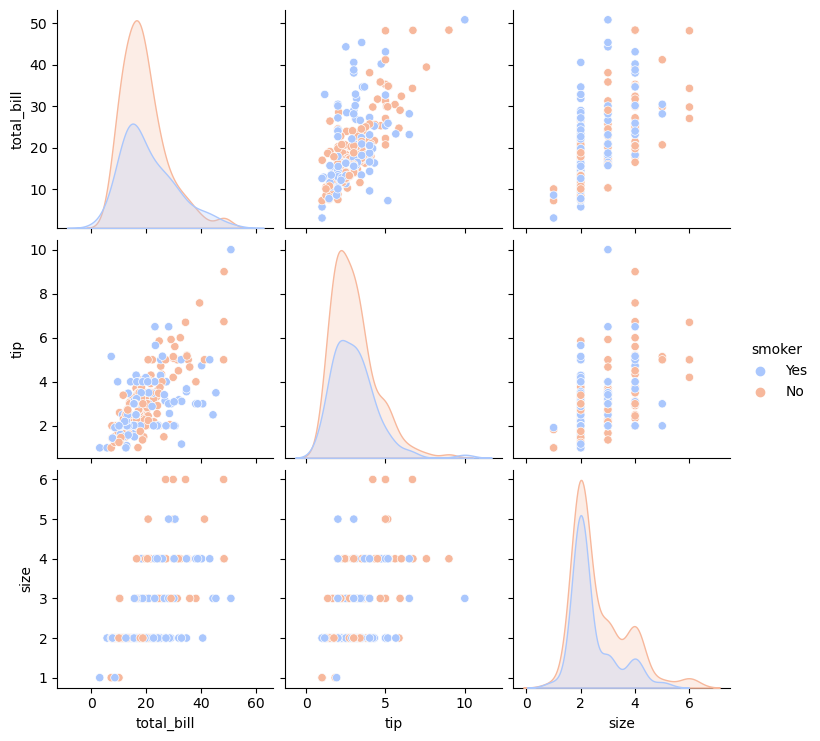

In [98]:
sns.pairplot(tips,hue='smoker',palette='coolwarm')
plt.show()

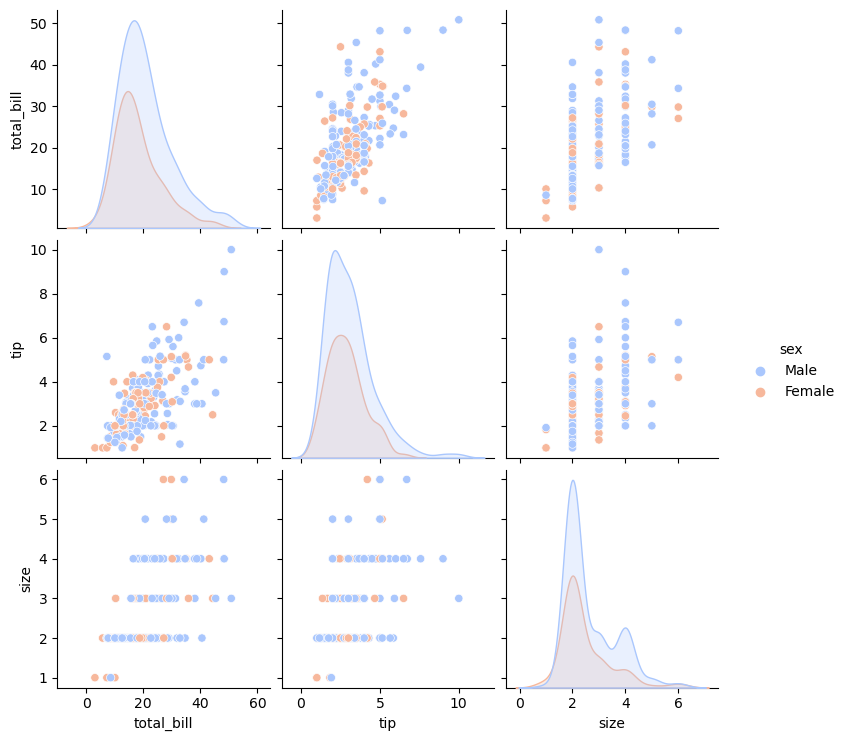

In [99]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
plt.show()

## Box Plot:

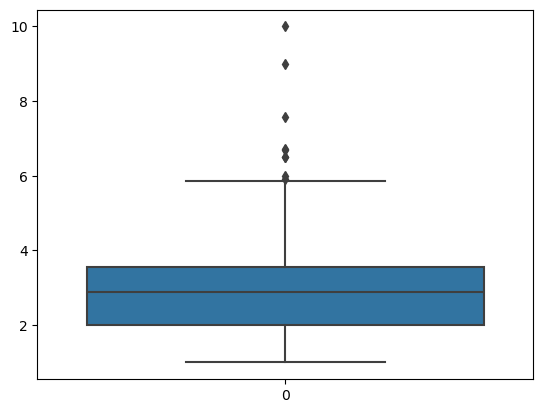

In [102]:
# univariant Box plot
sns.boxplot(tips.tip)
plt.show()

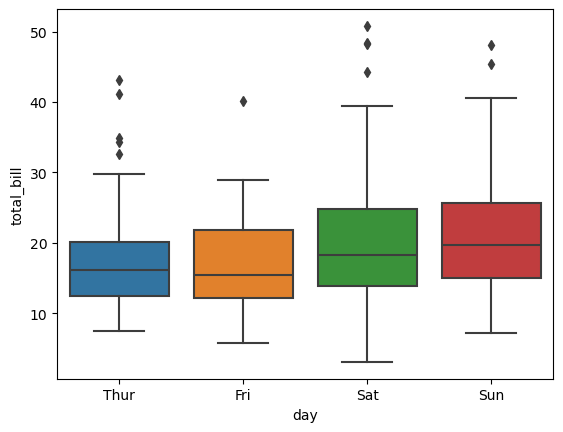

In [105]:
# Bivariant Box plot --> On X Axis - Categorical feature and on y axis numerical feature
sns.boxplot(x='day',y='total_bill',data=tips,)
plt.show()

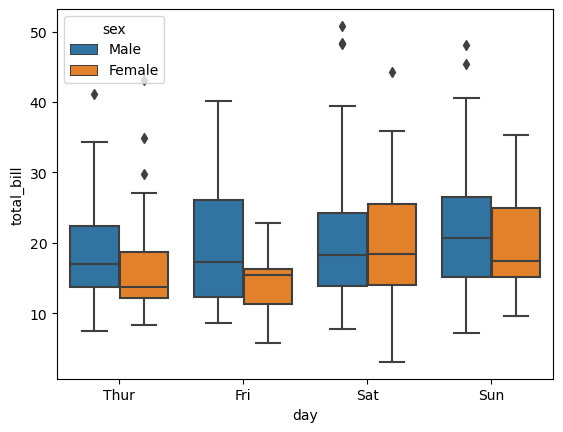

In [108]:
# Bivariant Box plot --> On X Axis - Categorical feature and on y axis numerical feature and hue is also a categorical feature
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')
plt.show()

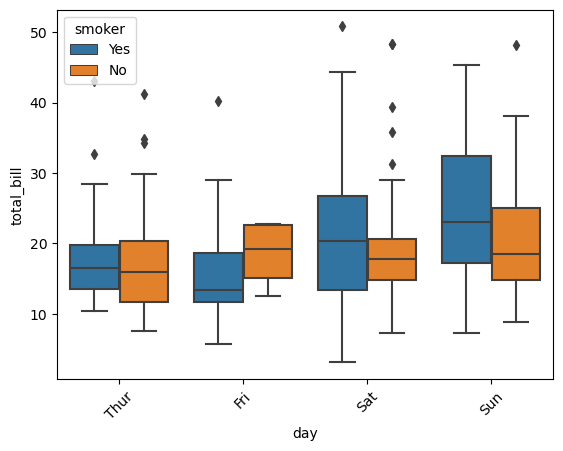

In [112]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')
plt.xticks(rotation=45)
plt.show()

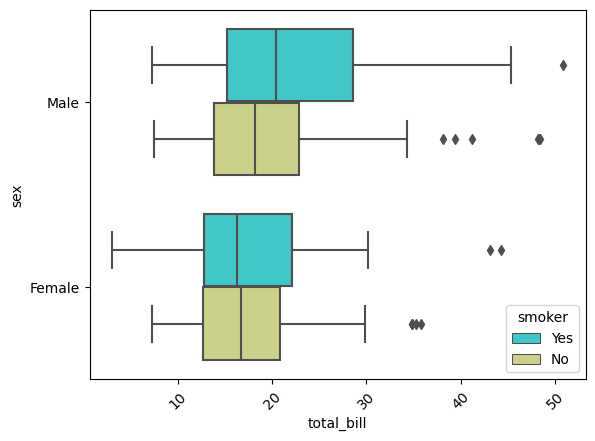

In [115]:
# Horizontal Box Plot
#On Y Axis - Categorical feature and on X axis numerical feature
sns.boxplot(y='sex',x='total_bill',data=tips,hue='smoker',orient='h',palette='rainbow')
plt.xticks(rotation=45)
plt.show()

## Violin plot

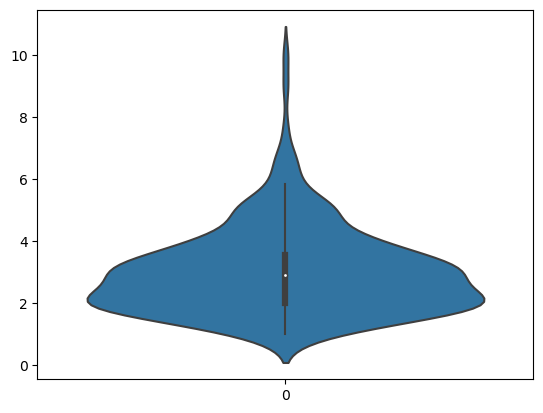

In [169]:
# univariant violinplot
sns.violinplot(tips.tip)
plt.show()

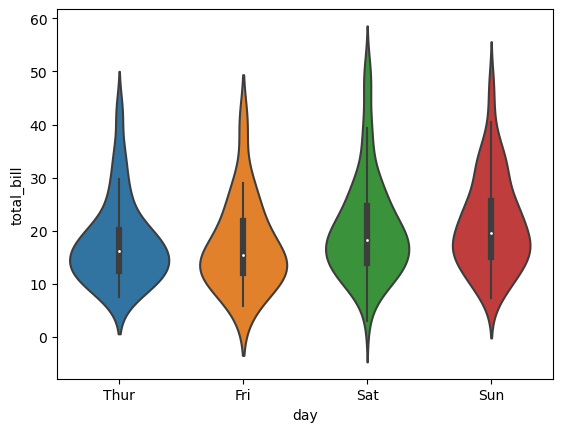

In [170]:
# Bivariant violinplot --> On X Axis - Categorical feature and on y axis numerical feature
sns.violinplot(x='day',y='total_bill',data=tips,)
plt.show()

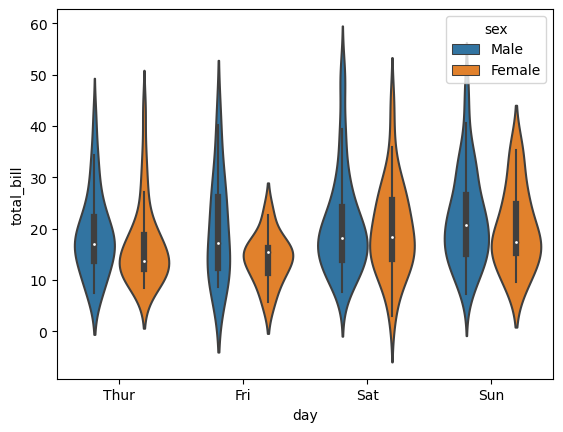

In [171]:
# Bivariant Violin Plot --> On X Axis - Categorical feature and on y axis numerical feature and hue is also a categorical feature
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')
plt.show()

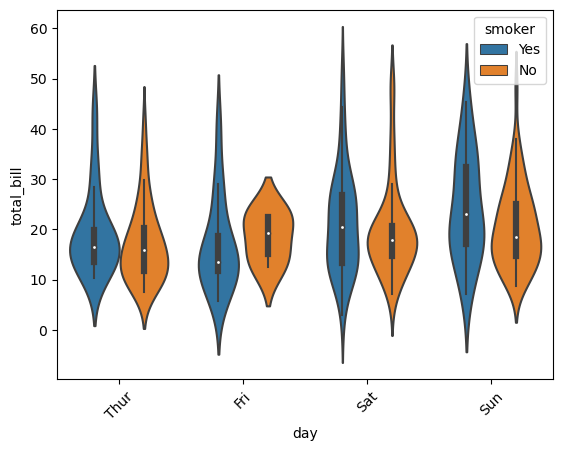

In [173]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')
plt.xticks(rotation=45)
plt.show()

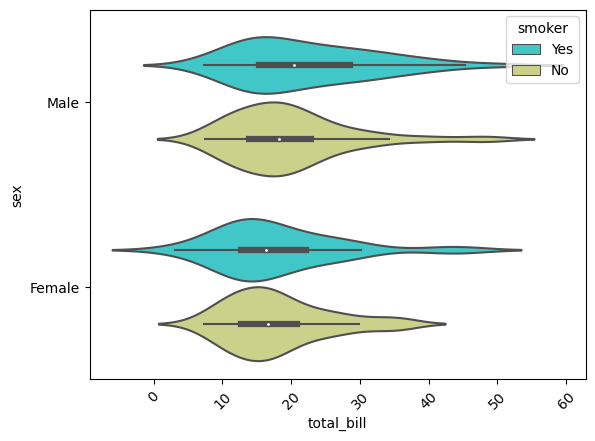

In [174]:
# Horizontal Vuolin Plot
#On Y Axis - Categorical feature and on X axis numerical feature
sns.violinplot(y='sex',x='total_bill',data=tips,hue='smoker',orient='h',palette='rainbow')
plt.xticks(rotation=45)
plt.show()

## Co-relation and heatmap

In [125]:
correlation=tips[num_features].corr()

<Axes: >

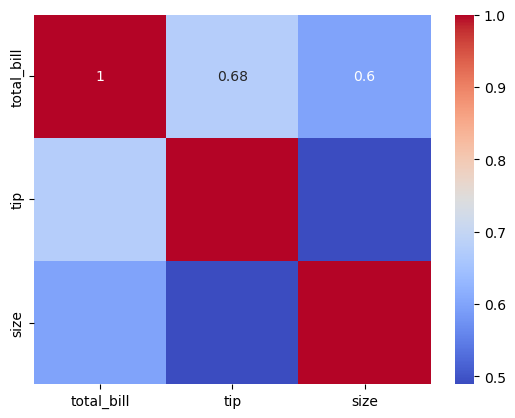

In [128]:
sns.heatmap(correlation,annot = True, cmap = 'coolwarm')

## Count Plot
1. can pass only one value of 'x' or 'y'
2. hue can be any categorical feature

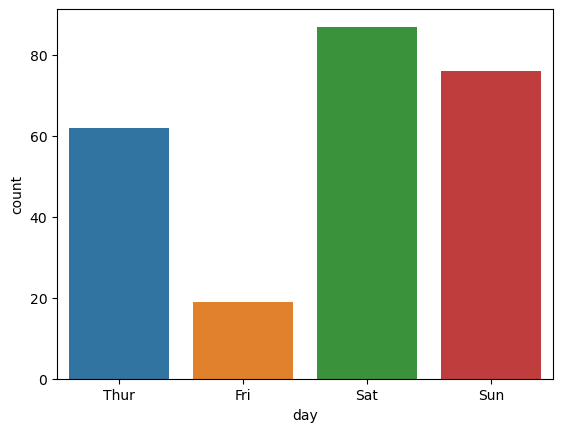

In [139]:
sns.countplot(x=tips.day)
plt.show()

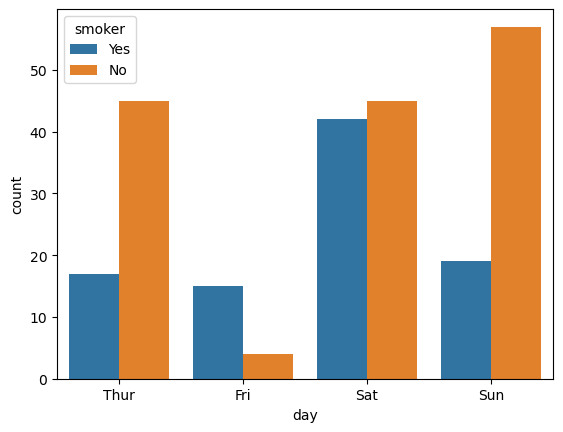

In [138]:
sns.countplot(x=tips.day, hue='smoker',data=tips)
plt.show()

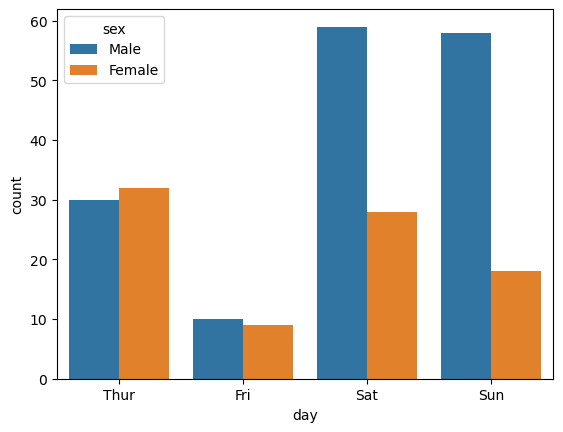

In [154]:
sns.countplot(x=tips.day, hue='sex',data=tips)
plt.show()

## lmplot
1. Scatter plot + Linear Regression Line
2. Two numerical features are preferred
3. data is a required field
4. aspect is given to zoom in
5. height to adjust height of the plot

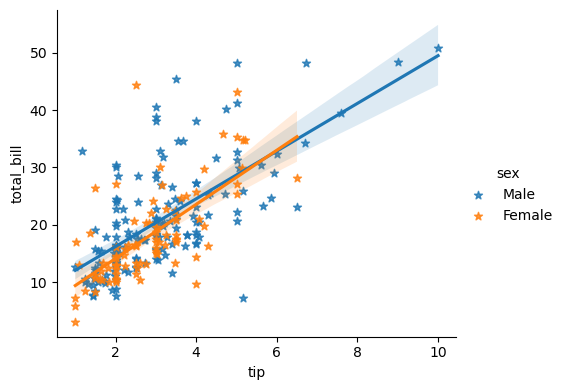

In [166]:
sns.lmplot(x='tip',y='total_bill',data=tips,aspect=1.2, height=4,hue='sex',markers='*')
plt.show()